In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비

In [2]:
# 패션 mnist 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 이미지 입력시에는 채널에 대한 정보가 있어야 함
# 지금은 Conv2D를 적용하기 위해서 채널 차원을 추가
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
scaled_train.shape

(60000, 28, 28, 1)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
scaled_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 합성곱 신경망 모델 구성

1. 합성곱층으로 이미지에서 특징을 감지
2. 밀집층으로 클래스에 따른 분류 확률을 계산

In [8]:
model = keras.Sequential()

In [9]:
# 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (28, 28, 1)))

- 패션MNIST 이미지가 (28, 28) 크기에 세임 패딩을 적용, 32개의 필터 사용
    - 출력되는 특성맵의 크기는 (28, 28, 32)

In [10]:
# 풀링 층 추가
model.add(keras.layers.MaxPool2D(2))

- (2, 2)크기의 커널을 이용하여 풀링을 적용해서 특성맵의 크기가 절반으로 줄어들고 특성맵의 깊이는 그대로
    - 출력되는 특성맵의 크기는 (14, 14, 32)

In [11]:
# 두 번째 합성곱 - 풀링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))

- (14, 14)크기에 세임 패딩, 64개의 필터 사용
    - 출력되는 특성맵의 크기 (14, 14, 64)
    
- (2, 2)크기의 커널을 이용하여 풀링
    - 출력되는 특성되는 맵의 크기(7, 7, 64)

In [12]:
# 3차원 특성맵을 일렬로 펼침
# 10개의 뉴런을 가진 밀집층에서 확률을 계산하기 때문에
model.add(keras.layers.Flatten())

In [13]:
# 밀집 은닉층을 하나 더 추가한 후 드롭아웃을 넣어 과대적합을 방지하고 성능을 개선
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))

In [14]:
# 출력층
# 10개의 클래스를 분류하는 다중 분류 
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

- 파라미터 개수
    - 첫 번째 합성곱 층
        - 필터의 크기 : (3, 3, 1)
        - 필터의 개수 : 32
        - 3 * 3 * 1 * 32 + 32 = 320
        
    - 두 번째 합성곱 층
        - 필터의 크기 : (3, 3, 32)
        - 필터의 개수 : 64
        - 3 * 3 * 32 * 64 + 64 = 18496
        
    - 밀집 은닉층
        - Flatten 층에서 (3136,) 크기의 배열이 전달(7 * 7 * 64)
        - 3136 * 100 + 100 = 313700
        
    - 출력층
        - 밀집 은닉층에서 (100,) 크기의 배열이 전달
        - 100 * 10 + 10 = 1010

# 모델 훈련

- 옵티마이저 : Adam
- 콜백 함수 : ModelCheckpoint, EarlyStopping

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

In [17]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")

In [18]:
history = model.fit(scaled_train, y_train, epochs = 20, validation_split = 0.2, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.8088

C:\Users\yjg10\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 21s 14ms/step - loss: 0.5353 - accuracy: 0.8089 - val_loss: 0.3401 - val_accuracy: 0.8702
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3480 - accuracy: 0.8764 - val_loss: 0.2795 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2966 - accuracy: 0.8935 - val_loss: 0.2614 - val_accuracy: 0.9007
Epoch 4/20
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2651 - accuracy: 0.9056 - val_loss: 0.2551 - val_accuracy: 0.9032
Epoch 5/20
1500/1500 [==============================] - 44s 30ms/step - loss: 0.2436 - accuracy: 0.9121 - val_loss: 0.2347 - val_accuracy: 0.9144
Epoch 6/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2202 - accuracy: 0.9194 - val_loss: 0.2343 - val_accuracy: 0.9146
Epoch 7/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2017 - accuracy: 0.9258 - val_loss: 0.2234 - val_accura

# 훈련 로그 확인

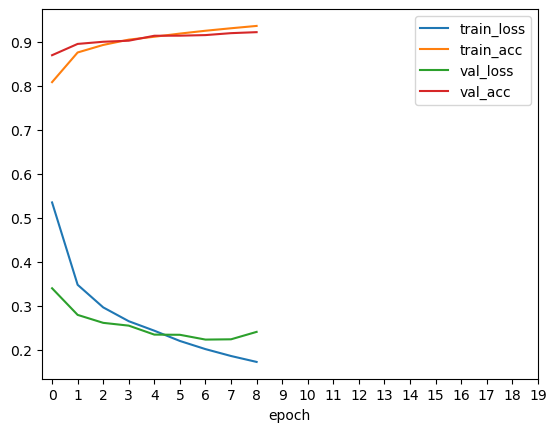

In [19]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")
plt.xticks(ticks = range(20))
plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 성능 검증

In [20]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

In [21]:
model.evaluate(scaled_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2416 - accuracy: 0.9115


[0.24156124889850616, 0.9114999771118164]

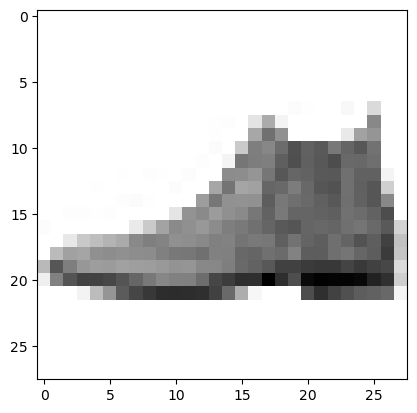

In [22]:
# 데이터 시각화
plt.imshow(scaled_test[0].reshape(28, 28), cmap = "gray_r")
plt.show()

In [23]:
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 [==============================] - 0s 126ms/step
[[9.2430810e-09 3.7803118e-11 8.1951654e-09 2.3306290e-09 1.8536332e-09
  3.6956728e-05 2.8360777e-08 9.7413984e-05 7.6991702e-10 9.9986553e-01]]


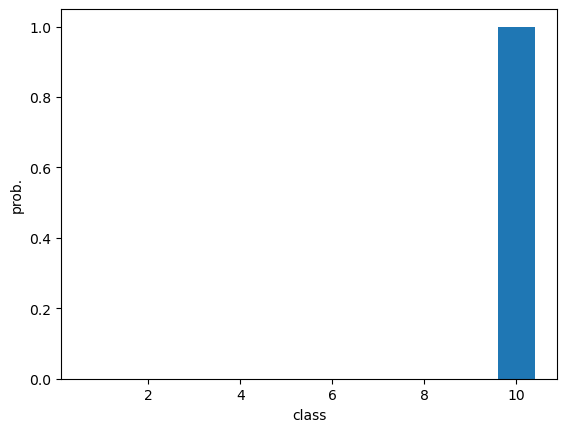

In [24]:
plt.figure()
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [25]:
# 레이블 리스트
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클부츠"]

In [26]:
print(classes[np.argmax(preds)])

앵클부츠


In [27]:
classes[y_test[0]]

'앵클부츠'